**Экономисты ЭФ НГУ, 22.03.2023**

### Актуальность

Почему важно уметь производить матричное дифференцирование? Во-первых, намного удобнее и эстетичнее работать с матрицами, чем с объектами этой матрицы, во-вторых, производительность матричного дифференцирования обычно очень хорошо оптимизирована в библиотеках и имеет преимущество в сравнении с циклическими вычислениями i,j,s,m. Поэтому цель данного занятия научиться вычислять производные в удобном, векторно-матричном виде. Для начала мы должны ввести ясную систему обозначений, составляющую ядро техники матричного дифференцирования.

### Основные обозначения:

Определение производной функции $$f∶ \mathbb R^m→\mathbb R^n.$$ 

- Функция $f(x)$ дифференцируема в точке $x_0$, если 

$$f(x_0+∆x)=f(x_0 )+[D_{x_0} f](∆x)+o ̿(‖∆x‖),$$

- где $[D_{x_0} f]$ – дифференциал функции f, т.е. такое линейное отображение, которое «малое приращение $h=∆x$» переводит в «малое приращение $∆f$»:

$$f(x_0+∆x)-f(x_0 )≈[D_{x_0} f](∆x)$$

- Дифференциал зависит от точки $x_0$, в которой он берется: $[D_{x_0} f](∆x)$.


### Пример

**Вычислим градиент функции:**  $$f(x) = ||Ax-b||^2, \\ A - \text{константная матрица,  }b - \text{постоянный вектор}$$

- **Распишем квадрат модуля в виде скалярного произведения**

$$||Ax-b||^2 = \langle Ax-b, Ax-b \rangle$$

- **Применим формулу дифференциала произведения и воспользуемся симметричностью скалярного произведения:**

$$[D_{x_0}\langle Ax-b, Ax-b \rangle](h) =\langle [D_{x_0}(Ax-b)](h), Ax_0 - b\rangle + \langle Ax_0 - b, [D_{x_0}(Ax-b)](h)\rangle\\ = 2\langle Ax_0 - b, [D_{x_0}(Ax-b)](h)\rangle = 2\langle Ax_0 - b, Ah\rangle = \langle 2A^T(Ax_0-b),h\rangle$$

- **Получаем, что**

$$\nabla_{x_0}f = 2A^T(Ax_0-b)$$

- **Мы можем запоздоздрить, что минимум достигается в точке, где градиент обращается в ноль:**

$$x_* = (A^TA)^{-1}A^Tb$$

**Отметим, что обратная матрица существует, так как $rk(A^TA) = rkA$, а столбцы $A$ по условию линейно независимы и, следовательно, $rk(A^TA)$ равен размеру этой матрицы.**

### Метод наименьших квадратов

**Вычислим в матричном виде точную формулу для нахождения оценок множественной регрессии** 

$$f(x)=||Xw-y||^2= \langle Xw-y, Xw-y \rangle$$

$$[D_{w_0}\langle Xw-y, Xw-y \rangle](h) =\langle [D_{w_0}(Xw-y)](h), Xw_0-y\rangle + \langle Xw_0-y, [D_{w_0}(Xw-y)](h)\rangle = 2\langle Xw_0-y, [D_{w_0}(Xw_0-y)](h)\rangle = 2\langle Xw_0-y, Xh\rangle = \langle 2X^T(Xw_0-y),h\rangle$$

$$\nabla_{w_0}f = 2X^T(Xw_0-y)$$

Приравняем производную $f(x)$ к нулю и найдем $w_*$:

$$w_* = (X^TX)^{-1}X^Ty$$



**Вопрос:** Для вычисления $w_*$ нам приходится обращать (квадратную) матрицу $X^TX$, что возможно, только если она невырожденна. Что это значит с точки зрения анализа данных? Почему мы верим, что это выполняется во всех разумных ситуациях?

Для вещественной матрицы $X$ ранги матриц $X$ и $X^TX$ совпадают. Матрица $X^TX$ невырожденна (ненулевой определитель) тогда и только тогда, когда её ранг равен числу её столбцов, что равно числу столбцов матрицы $X$. Иными словами, формула регрессии поломается, только если столбцы матрицы X линейно зависимы. Столбцы матрицы $X$
 – это факторы (признаки). А если наши признаки линейно зависимы, то, наверное, что-то идёт не так и мы должны исключить часть из них, чтобы остались только линейно независимые. Другое дело, что зачастую признаки могут быть приближённо линейно зависимы, особенно если их много. Тогда матрица $X^TX$ будет близка к вырожденной, и это, как мы дальше увидим, будет вести к разным, в том числе вычислительным проблемам.

## Регуляризация

Всегда ли решение задачи регрессии единственно? Вообще говоря, нет. Так, если в выборке два признака будут линейно зависимы  (и следовательно, ранг матрицы будет меньше числа факторов),то гарантировано найдётся такой вектор весов $\nu$, что $\langle \nu, x_i \rangle = 0 \: \forall x_i$. В этом случае, если какой-то $w$ является решением оптимизационной задачи, то и $w+\alpha \nu$ тоже является решением для любого $\alpha$. То есть решение не только не обязано быть уникальным, так ещё может быть сколь угодно большим по модулю. Это создаёт вычислительные трудности. Малые погрешности признаков сильно возрастают при предсказании ответа, а в градиентном спуске накапливается погрешность из-за операций со слишком большими числами.

Конечно, в жизни редко бывает так, что признаки строго линейно зависимы, а вот быть приближённо линейно зависимыми они вполне могут. Такая ситуация называется мультиколлинеарностью. В этом случае у нас всё равно возникают проблемы, близкие к описанным выше. Дело в том, что $X \nu \sim 0$ для вектора $\nu$
, состоящего из коэффициентов приближённой линейной зависимости, и, соответственно, $X^TX \nu ≈ 0$, то есть матрица $X^TX$ снова будет близка к вырожденной. Как и любая симметричная матрица, она диагонализуется в некотором ортонормированном базисе, и некоторые из собственных значений $\lambda_i$ близки к нулю.

Важно ещё отметить, что в случае, когда несколько признаков линейно зависимы, веса $w_i$ при них теряют физический смысл. Может даже оказаться, что вес признака, с ростом которого таргет, казалось бы, должен увеличиваться, станет отрицательным. Это делает модель не только неточной, но и принципиально не интерпретируемой. Вообще, неадекватность знаков или величины весов – хорошее указание на мультиколлинеарность.

Для того, чтобы справиться с этой проблемой, задачу обычно регуляризуют, то есть добавляют к ней дополнительное ограничение на вектор весов. Это ограничение можно, как и исходный лосс, задавать по-разному, но, как правило, ничего сложнее, чем $L_1$ и $L_2$ нормы, не требуется.

Вместо исходной задачи теперь предлагается решить такую:



$$\min\limits_{w} L(f,X,y) = \min\limits_{w}(|Xw-y|_2^2 + \lambda|w|_k^k),$$

$\lambda$ - экзогенный параметр (гиперпараметр),

$w_k^k$ - один из двух вариантов:

$$w_2^2 = w_1^2 + w_2^2 + \dots + w_D^2,$$

$$w_1^1 = |w_1| + |w_2| + \dots + |w_D|$$

Добавка $\lambda|w|_k^k$ называется регуляризационным членом или регуляризаторов, а число $\lambda$ - коэффициентом регуляризации

- Параметр $\lambda$ является гиперпараметром модели и достаточно сильно влияет на качество итогового решения. Его подбирают на дополнительной **валидационной** выборке, а качество проверяют на тестовой, чтобы исключить переобучение.

- Отдельно нужно отметить, что вес $w_0$ соответствующий отступу от начала координат (то есть признаку из всех единиц), регуляризовать не нужно, потому что это не имеет смысла: потому что наша регрессия может быть на любом расстоянии на оси ординат

### Точное решение МНК для гребневой регрессии

**$L_2$-регуляризация (гребневая регрессия)**

$$\min\limits_{w} L(f,X,y) = \min\limits_{w}(|Xw-y|_2^2 + \lambda|w|_2^2),$$

$$f(x)=||Xw-y|| +\lambda||w||^2 = (Xw-y)^T(Xw-y)+\lambda \cdot w^Tw \\= \langle Xw-y, Xw-y \rangle +\lambda \cdot \langle w,w \rangle$$

- Дифференциал суммы равна сумме дифференциалов, поэтому посчитаем по отдельности и сложим. Дифференциал первого слагаемого мы считали выше, поэтому просто запишем, чему он равен

$$[D_{w_0}\langle Xw-y, Xw-y \rangle](h) = \langle 2X^T(Xw_0-y),h\rangle$$

$$\lambda[D_{w_0}\langle w,w \rangle](h)=\lambda\langle [D_{w_0}(w)](h), w_0\rangle + \lambda\langle w_0, [D_{w_0}(w)](h)\rangle = 2\lambda\langle w_0, [D_{w_0}(w)](h)\rangle = 2\lambda\langle w_0,h\rangle$$

- Получаем, что градиент функции $f$ равен:

$$\nabla_{w_0}f = 2X^T(Xw_0-y) + 2\lambda w_0$$

- Приравняем производную $f(x)$ к нулю и найдем $w_*$:

$$w_* = (X^TX + \lambda I_{D*D})^{-1}X^Ty$$

- Здесь уже видно, какую роль играет $L_2$-регуляризация. Если матрица $X^TX$ плохо обусловлена, т.е. есть близкие к линейной зависимости признаки, то прибавка $\lambda I$ ведет к тому, что к каждому диагональному элементу матрицы $X^TX$ будет добавляться некоторое значение $\lambda$. Это и помогает решить проблему мультиколлинеарности признаков.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
IL

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21]])

In [4]:
x = np.arange(0,10.1, 0.1)
y = np.array([a**3 - 10*a**2 + 3*a + 500 for a in x])
x_train, y_train = x[::2], y[::2]
D = 13 # размер признакового пространства
L = 21 # lambda

X = np.array([[a**i for i in range(D)] for a in x])
IL = np.array([[L if i==j else 0 for j in range(D)] for i in range(D)]) # матрица lambda*I

IL[0][0] = 0 # первый коэффициент не регуляризуем
X_train = X[::2] # обучающая выборка признаков
Y = y_train # обучаюшие ответы

# Вычисление коэффициентов по формуле w_*:
A = np.linalg.inv(X_train.T @ X_train + IL)
w = Y @ X_train @ A # @ - матричное умножение
# w = A @ X_train.T @ Y # @ - матричное умножение

print(w)

[ 4.97749059e+02 -5.83841616e-01 -9.86881274e-01 -1.26079402e+00
 -1.08696520e+00 -1.92496467e-01  6.57243140e-01 -3.00964437e-01
  6.78282510e-02 -8.81518482e-03  6.73805494e-04 -2.82357810e-05
  5.01820097e-07]


In [10]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
from numpy.linalg import inv

a = np.array([[1., 2.], [3., 4.]])
ainv = inv(a)
np.allclose(np.dot(a, ainv), np.eye(2))

True

In [8]:
np.allclose(np.dot(ainv, a), np.eye(2))

True

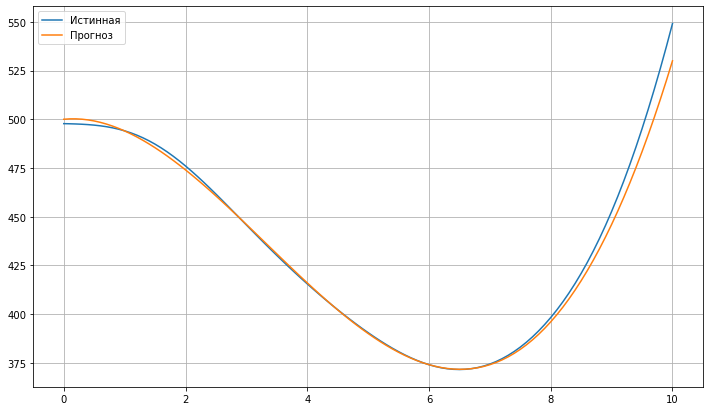

In [6]:
# Отображение исходного графика и прогноза
yy = [np.dot(w,x) for x in X]
plt.figure(figsize=(12, 7))
plt.plot(x,yy)
plt.plot(x,y)
plt.grid(True)
plt.legend(['Истинная','Прогноз'])
plt.show()